In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fear_greed_data = pd.read_csv('fear_greed_index.csv')
historical_data = pd.read_csv('historical_data.csv')


In [3]:
fear_greed_data.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
fear_greed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
fear_greed_data.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [8]:
historical_data.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [9]:
fear_greed_data['datetime'] = pd.to_datetime(fear_greed_data['timestamp'], unit='s')

In [10]:
historical_data['datetime'] = pd.to_datetime(historical_data['Timestamp'] / 1000, unit='s')

In [11]:
fear_greed_data = fear_greed_data.drop_duplicates()
historical_data = historical_data.drop_duplicates()

In [12]:
historical_data_cleaned = historical_data[
    ['datetime', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Closed PnL', 'Fee']
]

In [13]:
fear_greed_data = fear_greed_data.sort_values('datetime')

In [14]:
istorical_data_cleaned = historical_data_cleaned.sort_values('datetime')

In [15]:
fear_greed_data.describe()

,timestamp,value,datetime
count,2.644000e+03,2644.000000,2644
mean,1.631899e+09,46.981089,2021-09-17 17:14:45.022693120
min,1.517463e+09,5.000000,2018-02-01 05:30:00
25%,1.574811e+09,28.000000,2019-11-26 23:30:00
50%,1.631900e+09,46.000000,2021-09-17 17:30:00
75%,1.688989e+09,66.000000,2023-07-10 11:30:00
max,1.746164e+09,95.000000,2025-05-02 05:30:00
std,6.597967e+07,21.827680,NaN


In [16]:
historical_data_cleaned.describe()

,datetime,Execution Price,Size Tokens,Size USD,Closed PnL,Fee
count,211224,211224.000000,2.112240e+05,2.112240e+05,211224.000000,211224.000000
mean,2025-01-24 18:44:50.421542912,11414.723350,4.623365e+03,5.639451e+03,48.749001,1.163967
min,2023-03-28 10:40:00,0.000005,8.740000e-07,0.000000e+00,-117990.104100,-1.175712
25%,2025-02-19 21:20:00,4.854700,2.940000e+00,1.937900e+02,0.000000,0.016121
50%,2025-02-19 21:20:00,18.280000,3.200000e+01,5.970450e+02,0.000000,0.089578
75%,2025-02-19 21:20:00,101.580000,1.879025e+02,2.058960e+03,5.792797,0.393811
max,2025-06-15 15:06:40,109004.000000,1.582244e+07,3.921431e+06,135329.090100,837.471593
std,NaN,29447.654868,1.042729e+05,3.657514e+04,919.164828,6.758854


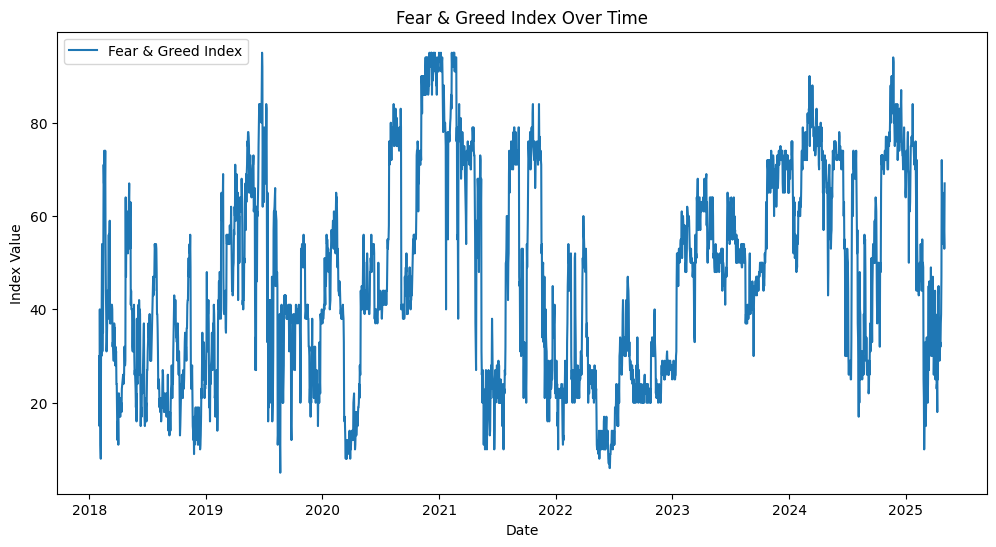

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(fear_greed_data['datetime'], fear_greed_data['value'], label='Fear & Greed Index')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.title('Fear & Greed Index Over Time')
plt.show()


In [20]:
fear_greed_data = fear_greed_data.sort_values(by='datetime')
historical_data_cleaned = historical_data_cleaned.sort_values(by='datetime')

In [21]:
# Perform the merge operation
combined_data = pd.merge_asof(
    historical_data_cleaned, 
    fear_greed_data, 
    on='datetime', 
    direction='backward'
)


In [22]:
combined_data.head()

,datetime,Execution Price,Size Tokens,Size USD,Side,Closed PnL,Fee,timestamp,value,classification,date
0,2023-03-28 10:40:00,1898.60000,0.0722,137.08,BUY,0.000000,0.000000,1679981400,59,Greed,2023-03-28
1,2023-03-28 10:40:00,1897.90000,0.0824,156.39,BUY,0.000000,0.000000,1679981400,59,Greed,2023-03-28
2,2023-03-28 10:40:00,1897.90000,0.0967,183.53,BUY,0.000000,0.000000,1679981400,59,Greed,2023-03-28
3,2023-11-14 22:13:20,0.44868,15078.0000,6765.20,SELL,-160.580700,1.691299,1699939800,69,Greed,2023-11-14
4,2023-11-14 22:13:20,1.46680,3348.0000,4910.85,SELL,-13.432176,1.227711,1699939800,69,Greed,2023-11-14


C:\Users\91638\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


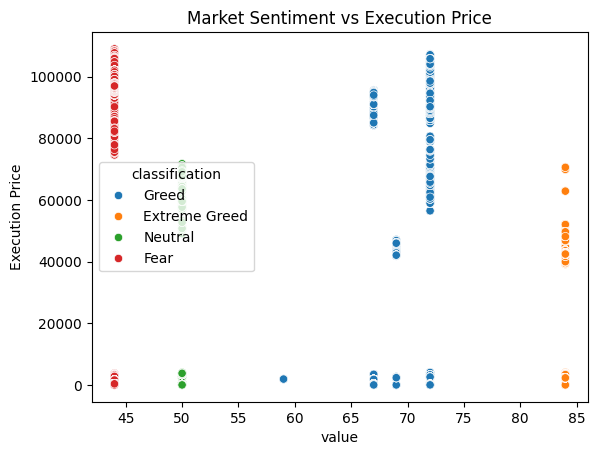

In [23]:
sns.scatterplot(data=combined_data, x='value', y='Execution Price', hue='classification')
plt.title('Market Sentiment vs Execution Price')
plt.show()


In [24]:
sentiment_analysis = combined_data.groupby('classification')['Size USD'].mean()
sentiment_analysis


classification
Extreme Greed    5660.265764
Fear             5259.977837
Greed            6731.682923
Neutral          3058.848110
Name: Size USD, dtype: float64

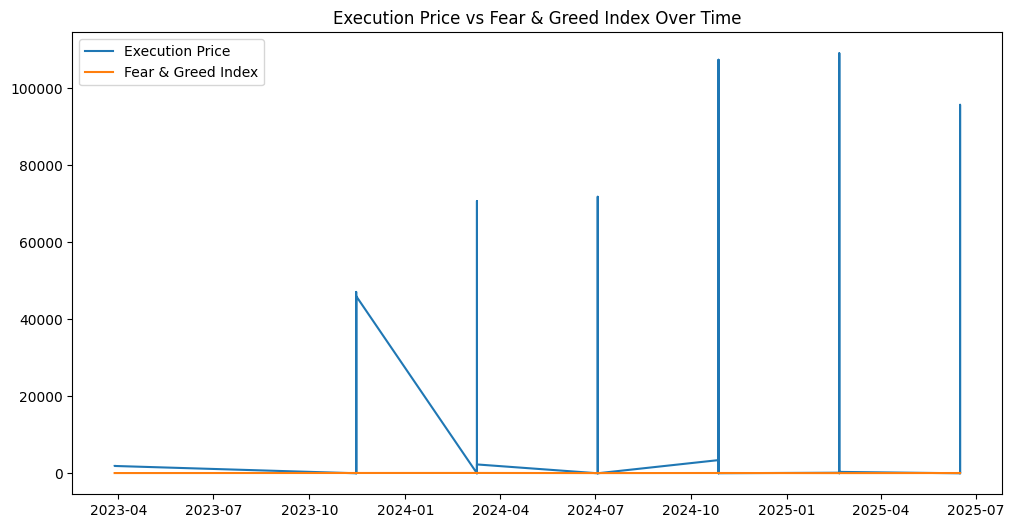

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(combined_data['datetime'], combined_data['Execution Price'], label='Execution Price')
plt.plot(combined_data['datetime'], combined_data['value'], label='Fear & Greed Index')
plt.legend()
plt.title('Execution Price vs Fear & Greed Index Over Time')
plt.show()


In [26]:
combined_data.to_csv('combined_data_analysis.csv', index=False)